{0: {'state': 1, 'timer': 1}, 1: {'state': 0, 'timer': 2}, 2: {'state': 0, 'timer': 3}, 3: {'state': 0, 'timer': 4}}


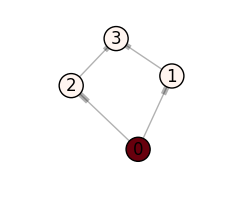

In [200]:
%matplotlib inline
import timer_act_abs as ta
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([(0,1), (0,2), (2,3), (1,3)])
timer_list = [1, 2, 3, 4]
for node in G:
    G.node[node]['state'] = 0
    G.node[node]['timer'] = timer_list[node]
    if node == 0:
        G.node[node]['state'] = 1

print G.node
pos = nx.spring_layout(G)

plt.figure(figsize=(2,2))
nx.draw_networkx_nodes(G, pos, node_color=[G.node[node]['state'] for node in G], cmap=plt.cm.Reds)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

# Fractional threshold

{0: {'threshold': 0.1, 'state': 1, 'timer': 1}, 1: {'threshold': 0.1, 'state': 0, 'timer': 2}, 2: {'threshold': 0.1, 'state': 0, 'timer': 3}, 3: {'threshold': 0.1, 'state': 0, 'timer': 4}}
[1, 2]
step: 0


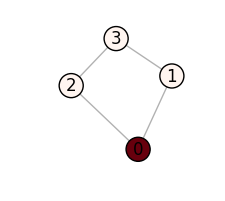

new_adoption_at_t: {0: [0], 1: []}
new_tick_at_t: {0: [2, 1]}
unadopted_nodes: [1, 2]
no_infected_nodes_at_current_step: [1, 1]
step: 2


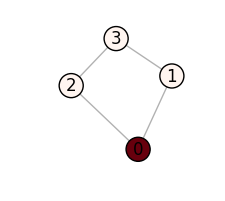

new_adoption_at_t: {0: [0], 1: [], 3: [1]}
new_tick_at_t: {0: [2, 1], 2: [2]}
unadopted_nodes: [2, 3]
no_infected_nodes_at_current_step: [1, 1]
step: 3


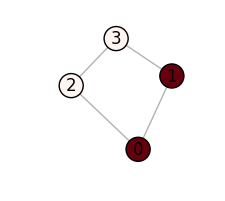

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2]}
new_tick_at_t: {0: [2, 1], 2: [2], 3: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1]
step: 4


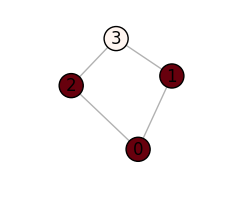

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: []}
new_tick_at_t: {0: [2, 1], 2: [2], 3: [3], 4: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 7


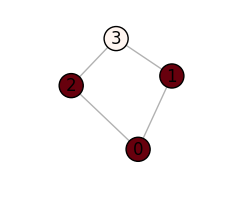

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3]}
new_tick_at_t: {0: [2, 1], 2: [2], 3: [3], 4: [3], 7: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 8


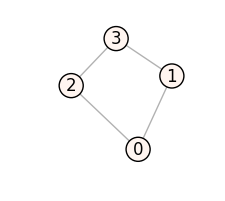

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3], 9: []}
new_tick_at_t: {0: [2, 1], 2: [2], 3: [3], 4: [3], 7: [], 8: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3, 4]
{0: {'threshold': 0.1, 'state': 1, 'timer': 1}, 1: {'threshold': 0.1, 'state': 1, 'timer': 0}, 2: {'threshold': 0.1, 'state': 1, 'timer': 0}, 3: {'threshold': 0.1, 'state': 1, 'timer': 0}}


In [201]:
%matplotlib inline
import timer_act_abs as ta
import networkx as nx
import matplotlib.pyplot as plt

Gcc = G.copy()
Gcc = Gcc.to_undirected()
Gcc.add_edges_from([(0,1), (0,2), (2,3), (1,3)])
timer_list = [1, 2, 3, 4]
for node in Gcc:
    Gcc.node[node]['threshold'] = 0.1

print Gcc.node


no_infected_nodes_at_current_step = [1]
adopted_nodes = [0]
new_adoption_at_t = {0: [0]}	#{time: list of newly activated nodes}
new_tick_at_t = {}
step = 0

unadopted_nodes = []
for node in new_adoption_at_t[step]:
    for neighbour in Gcc[node]:
        if Gcc.node[neighbour]['state'] == 0:
            unadopted_nodes.append(neighbour)
unadopted_nodes = list(set(unadopted_nodes))
print unadopted_nodes

while 1:
    print "step: " + str(step)
    plt.figure(figsize=(2,2))
    nx.draw_networkx_nodes(Gcc, pos, node_color=[Gcc.node[node]['state'] for node in G], cmap=plt.cm.Reds)
    nx.draw_networkx_edges(Gcc, pos, alpha=0.3)
    nx.draw_networkx_labels(Gcc, pos)
    plt.axis("off")
    plt.show()
    new_adoption_at_t[step+1], new_tick_at_t[step] = ta.timer_thr_dyn(Gcc, unadopted_nodes, 'frac')
    print "new_adoption_at_t: " + str(new_adoption_at_t)
    print "new_tick_at_t: " + str(new_tick_at_t)
    for node in new_adoption_at_t[step+1]:
        unadopted_nodes.remove(node)
        for neighbour in Gcc[node]:
            if Gcc.node[neighbour]['state'] == 0:
                unadopted_nodes.append(neighbour)
    unadopted_nodes = list(set(unadopted_nodes))
    print "unadopted_nodes: " + str(unadopted_nodes)

    
    for new_adopted_node in new_adoption_at_t[step+1]:
        adopted_nodes.append(new_adopted_node)

    no_infected_nodes_at_current_step.append(len(adopted_nodes))


    if len(new_adoption_at_t[step+1]) != 0:
        step += 1
        pass
    elif len(new_adoption_at_t[step+1]) == 0 and len(new_tick_at_t[step]) != 0:
        time_slip = min([Gcc.node[i]['timer'] for i in new_tick_at_t[step]]) + 1
        for node in new_tick_at_t[step]:
            Gcc.node[node]['timer'] -= (time_slip - 1)
        step += time_slip
        for rounds in range(time_slip-1):
            no_infected_nodes_at_current_step.append(no_infected_nodes_at_current_step[-1])
    else:
        break
    no_infected_nodes_at_current_step.pop(-1) # popping the last element comes from that simulation runs until a step after the system reaches steady state.
    print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
time_to_steady_current = len(no_infected_nodes_at_current_step) - 1 # -1 comes from that the length of no_infected_nodes_at_current_step includes 0th element which is at time step 0.


print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
print Gcc.node



# Fractional threshold on directed graph

In [245]:
%matplotlib inline
# import timer_act_abs as ta
import timer_act_directed as ta
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([(0,1), (0,2), (2,3), (1,3)])
# G.add_edges_from([(1,0), (2,0), (3,2), (3,1)])
timer_list = [1, 2, 3, 4]
for node in G:
    G.node[node]['state'] = 0
    G.node[node]['timer'] = timer_list[node]
    if node == 0:
        G.node[node]['state'] = 1

Gcc = G.copy()
for node in Gcc:
    Gcc.node[node]['threshold'] = 0.1
# print Gcc.is_directed()
# Gcc = Gcc.to_undirected()
# Gcc = Gcc.reverse()


In [246]:
print Gcc[0]
print Gcc.out_degree()
print Gcc.in_degree()

{1: {}, 2: {}}
{0: 2, 1: 1, 2: 1, 3: 0}
{0: 0, 1: 1, 2: 1, 3: 2}


[1, 2]
step: 0


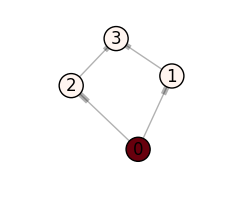

new_adoption_at_t: {0: [0], 1: []}
new_tick_at_t: {0: [1, 2]}
unadopted_nodes: [1, 2]
no_infected_nodes_at_current_step: [1, 1]
step: 2


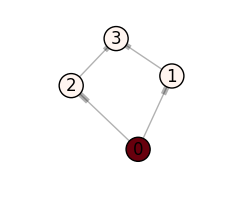

new_adoption_at_t: {0: [0], 1: [], 3: [1]}
new_tick_at_t: {0: [1, 2], 2: [2]}
unadopted_nodes: [2, 3]
no_infected_nodes_at_current_step: [1, 1]
step: 3


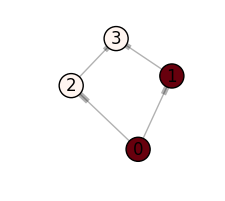

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2]}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1]
step: 4


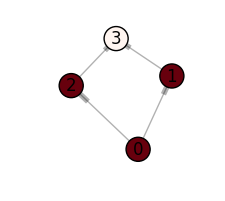

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: []}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 7


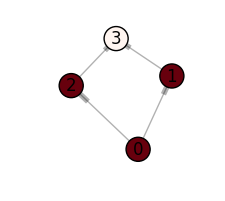

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3]}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3], 7: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 8


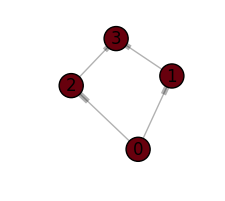

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3], 9: []}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3], 7: [], 8: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3, 4]
{0: {'threshold': 0.1, 'state': 1, 'timer': 1}, 1: {'threshold': 0.1, 'state': 1, 'timer': 0}, 2: {'threshold': 0.1, 'state': 1, 'timer': 0}, 3: {'threshold': 0.1, 'state': 1, 'timer': 0}}


In [247]:
no_infected_nodes_at_current_step = [1]
adopted_nodes = [0]
new_adoption_at_t = {0: [0]}	#{time: list of newly activated nodes}
new_tick_at_t = {}
step = 0

unadopted_nodes = []
for node in new_adoption_at_t[step]:
    for neighbour in Gcc[node]:
        if Gcc.node[neighbour]['state'] == 0:
            unadopted_nodes.append(neighbour)
unadopted_nodes = list(set(unadopted_nodes))
print unadopted_nodes

while 1:
    print "step: " + str(step)
    plt.figure(figsize=(2,2))
    nx.draw_networkx_nodes(Gcc, pos, node_color=[Gcc.node[node]['state'] for node in G], cmap=plt.cm.Reds, vmin=0, vmax=1)
    nx.draw_networkx_edges(Gcc, pos, alpha=0.3)
    nx.draw_networkx_labels(Gcc, pos)
    plt.axis("off")
    plt.show()
    
    new_adoption_at_t[step+1], new_tick_at_t[step] = ta.timer_thr_dyn(Gcc, unadopted_nodes, 'frac')
    print "new_adoption_at_t: " + str(new_adoption_at_t)
    print "new_tick_at_t: " + str(new_tick_at_t)
    for node in new_adoption_at_t[step+1]:
        unadopted_nodes.remove(node)
        for neighbour in Gcc[node]:
            if Gcc.node[neighbour]['state'] == 0:
                unadopted_nodes.append(neighbour)
    unadopted_nodes = list(set(unadopted_nodes))
    print "unadopted_nodes: " + str(unadopted_nodes)

    
    for new_adopted_node in new_adoption_at_t[step+1]:
        adopted_nodes.append(new_adopted_node)

    no_infected_nodes_at_current_step.append(len(adopted_nodes))


    if len(new_adoption_at_t[step+1]) != 0:
        step += 1
        pass
    elif len(new_adoption_at_t[step+1]) == 0 and len(new_tick_at_t[step]) != 0:
        time_slip = min([Gcc.node[i]['timer'] for i in new_tick_at_t[step]]) + 1
        for node in new_tick_at_t[step]:
            Gcc.node[node]['timer'] -= (time_slip - 1)
        step += time_slip
        for rounds in range(time_slip-1):
            no_infected_nodes_at_current_step.append(no_infected_nodes_at_current_step[-1])
    else:
        break
    no_infected_nodes_at_current_step.pop(-1) # popping the last element comes from that simulation runs until a step after the system reaches steady state.
    print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
time_to_steady_current = len(no_infected_nodes_at_current_step) - 1 # -1 comes from that the length of no_infected_nodes_at_current_step includes 0th element which is at time step 0.


print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
print Gcc.node

# Absolute threshold

{0: {'threshold': 1, 'state': 1, 'timer': 1}, 1: {'threshold': 1, 'state': 0, 'timer': 2}, 2: {'threshold': 1, 'state': 0, 'timer': 3}, 3: {'threshold': 1, 'state': 0, 'timer': 4}}
[1, 2]
step: 0


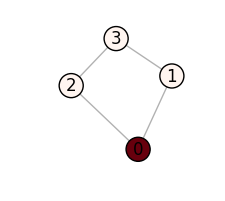

new_adoption_at_t: {0: [0], 1: []}
new_tick_at_t: {0: [1, 2]}
unadopted_nodes: [1, 2]
no_infected_nodes_at_current_step: [1, 1]
step: 2


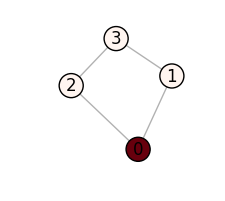

new_adoption_at_t: {0: [0], 1: [], 3: [1]}
new_tick_at_t: {0: [1, 2], 2: [2]}
unadopted_nodes: [2, 3]
no_infected_nodes_at_current_step: [1, 1]
step: 3


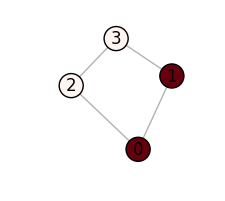

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2]}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1]
step: 4


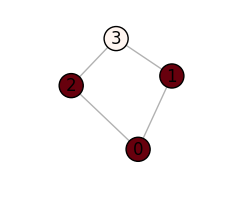

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: []}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 7


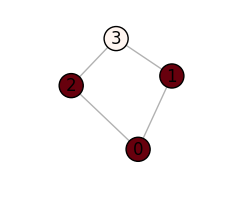

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3]}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3], 7: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 8


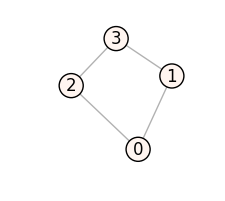

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3], 9: []}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3], 7: [], 8: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3, 4]
{0: {'threshold': 1, 'state': 1, 'timer': 1}, 1: {'threshold': 1, 'state': 1, 'timer': 0}, 2: {'threshold': 1, 'state': 1, 'timer': 0}, 3: {'threshold': 1, 'state': 1, 'timer': 0}}


In [202]:
%matplotlib inline
import timer_act_abs as ta
import networkx as nx
import matplotlib.pyplot as plt

Gcc = G.copy()
Gcc = Gcc.to_undirected()
Gcc.add_edges_from([(0,1), (0,2), (2,3), (1,3)])
timer_list = [1, 2, 3, 4]
for node in Gcc:
    Gcc.node[node]['threshold'] = 1

print Gcc.node


no_infected_nodes_at_current_step = [1]
adopted_nodes = [0]
new_adoption_at_t = {0: [0]}	#{time: list of newly activated nodes}
new_tick_at_t = {}
step = 0

unadopted_nodes = []
for node in new_adoption_at_t[step]:
    for neighbour in Gcc[node]:
        if Gcc.node[neighbour]['state'] == 0:
            unadopted_nodes.append(neighbour)
unadopted_nodes = list(set(unadopted_nodes))
print unadopted_nodes

while 1:
    print "step: " + str(step)
    plt.figure(figsize=(2,2))
    nx.draw_networkx_nodes(Gcc, pos, node_color=[Gcc.node[node]['state'] for node in G], cmap=plt.cm.Reds)
    nx.draw_networkx_edges(Gcc, pos, alpha=0.3)
    nx.draw_networkx_labels(Gcc, pos)
    plt.axis("off")
    plt.show()
    new_adoption_at_t[step+1], new_tick_at_t[step] = ta.timer_thr_dyn(Gcc, unadopted_nodes, 'abs')
    print "new_adoption_at_t: " + str(new_adoption_at_t)
    print "new_tick_at_t: " + str(new_tick_at_t)
    for node in new_adoption_at_t[step+1]:
        unadopted_nodes.remove(node)
        for neighbour in Gcc[node]:
            if Gcc.node[neighbour]['state'] == 0:
                unadopted_nodes.append(neighbour)
    unadopted_nodes = list(set(unadopted_nodes))
    print "unadopted_nodes: " + str(unadopted_nodes)

    
    for new_adopted_node in new_adoption_at_t[step+1]:
        adopted_nodes.append(new_adopted_node)

    no_infected_nodes_at_current_step.append(len(adopted_nodes))


    if len(new_adoption_at_t[step+1]) != 0:
        step += 1
        pass
    elif len(new_adoption_at_t[step+1]) == 0 and len(new_tick_at_t[step]) != 0:
        time_slip = min([Gcc.node[i]['timer'] for i in new_tick_at_t[step]]) + 1
        for node in new_tick_at_t[step]:
            Gcc.node[node]['timer'] -= (time_slip - 1)
        step += time_slip
        for rounds in range(time_slip-1):
            no_infected_nodes_at_current_step.append(no_infected_nodes_at_current_step[-1])
    else:
        break
    no_infected_nodes_at_current_step.pop(-1) # popping the last element comes from that simulation runs until a step after the system reaches steady state.
    print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
time_to_steady_current = len(no_infected_nodes_at_current_step) - 1 # -1 comes from that the length of no_infected_nodes_at_current_step includes 0th element which is at time step 0.


print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
print Gcc.node



# Absolute threshold on directed network

In [230]:
%matplotlib inline
# import timer_act_abs as ta
import timer_act_directed as ta
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([(0,1), (0,2), (2,3), (1,3)])
# G.add_edges_from([(1,0), (2,0), (3,2), (3,1)])
timer_list = [1, 2, 3, 4]
for node in G:
    G.node[node]['state'] = 0
    G.node[node]['timer'] = timer_list[node]
    if node == 0:
        G.node[node]['state'] = 1

Gcc = G.copy()
for node in Gcc:
    Gcc.node[node]['threshold'] = 1
# print Gcc.is_directed()
# Gcc = Gcc.to_undirected()
# Gcc = Gcc.reverse()


In [231]:
print Gcc[0]
print Gcc.out_degree()
print Gcc.in_degree()

{1: {}, 2: {}}
{0: 2, 1: 1, 2: 1, 3: 0}
{0: 0, 1: 1, 2: 1, 3: 2}


[1, 2]
step: 0


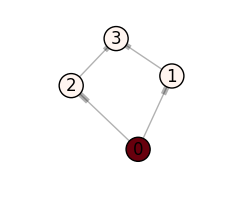

new_adoption_at_t: {0: [0], 1: []}
new_tick_at_t: {0: [1, 2]}
unadopted_nodes: [1, 2]
no_infected_nodes_at_current_step: [1, 1]
step: 2


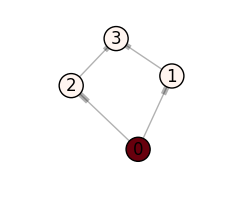

new_adoption_at_t: {0: [0], 1: [], 3: [1]}
new_tick_at_t: {0: [1, 2], 2: [2]}
unadopted_nodes: [2, 3]
no_infected_nodes_at_current_step: [1, 1]
step: 3


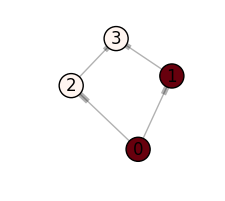

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2]}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1]
step: 4


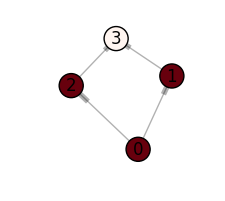

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: []}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3]}
unadopted_nodes: [3]
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 7


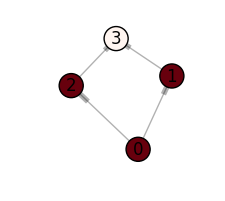

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3]}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3], 7: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3]
step: 8


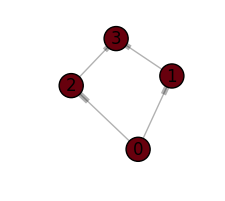

new_adoption_at_t: {0: [0], 1: [], 3: [1], 4: [2], 5: [], 8: [3], 9: []}
new_tick_at_t: {0: [1, 2], 2: [2], 3: [3], 4: [3], 7: [], 8: []}
unadopted_nodes: []
no_infected_nodes_at_current_step: [1, 1, 3, 3, 4]
{0: {'threshold': 1, 'state': 1, 'timer': 1}, 1: {'threshold': 1, 'state': 1, 'timer': 0}, 2: {'threshold': 1, 'state': 1, 'timer': 0}, 3: {'threshold': 1, 'state': 1, 'timer': 0}}


In [232]:
no_infected_nodes_at_current_step = [1]
adopted_nodes = [0]
new_adoption_at_t = {0: [0]}	#{time: list of newly activated nodes}
new_tick_at_t = {}
step = 0

unadopted_nodes = []
for node in new_adoption_at_t[step]:
    for neighbour in Gcc[node]:
        if Gcc.node[neighbour]['state'] == 0:
            unadopted_nodes.append(neighbour)
unadopted_nodes = list(set(unadopted_nodes))
print unadopted_nodes

while 1:
    print "step: " + str(step)
    plt.figure(figsize=(2,2))
    nx.draw_networkx_nodes(Gcc, pos, node_color=[Gcc.node[node]['state'] for node in G], cmap=plt.cm.Reds, vmin=0, vmax=1)
    nx.draw_networkx_edges(Gcc, pos, alpha=0.3)
    nx.draw_networkx_labels(Gcc, pos)
    plt.axis("off")
    plt.show()
    
    new_adoption_at_t[step+1], new_tick_at_t[step] = ta.timer_thr_dyn(Gcc, unadopted_nodes, 'abs')
    print "new_adoption_at_t: " + str(new_adoption_at_t)
    print "new_tick_at_t: " + str(new_tick_at_t)
    for node in new_adoption_at_t[step+1]:
        unadopted_nodes.remove(node)
        for neighbour in Gcc[node]:
            if Gcc.node[neighbour]['state'] == 0:
                unadopted_nodes.append(neighbour)
    unadopted_nodes = list(set(unadopted_nodes))
    print "unadopted_nodes: " + str(unadopted_nodes)

    
    for new_adopted_node in new_adoption_at_t[step+1]:
        adopted_nodes.append(new_adopted_node)

    no_infected_nodes_at_current_step.append(len(adopted_nodes))


    if len(new_adoption_at_t[step+1]) != 0:
        step += 1
        pass
    elif len(new_adoption_at_t[step+1]) == 0 and len(new_tick_at_t[step]) != 0:
        time_slip = min([Gcc.node[i]['timer'] for i in new_tick_at_t[step]]) + 1
        for node in new_tick_at_t[step]:
            Gcc.node[node]['timer'] -= (time_slip - 1)
        step += time_slip
        for rounds in range(time_slip-1):
            no_infected_nodes_at_current_step.append(no_infected_nodes_at_current_step[-1])
    else:
        break
    no_infected_nodes_at_current_step.pop(-1) # popping the last element comes from that simulation runs until a step after the system reaches steady state.
    print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
time_to_steady_current = len(no_infected_nodes_at_current_step) - 1 # -1 comes from that the length of no_infected_nodes_at_current_step includes 0th element which is at time step 0.


print "no_infected_nodes_at_current_step: " + str(no_infected_nodes_at_current_step)
print Gcc.node